In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas_datareader import data, wb
from datetime import datetime, timedelta
import numpy as np
%matplotlib inline
import sqlite3

# Ativos da Carteira

In [6]:
conn = sqlite3.connect('ativos.db')
cursor = conn.cursor()
#Cria o array de ativos e dos ativos com quantidade
#query =" SELECT sigla, qtd FROM ativos WHERE moeda <> 'DIGITAL' AND moeda <> 'FI';"

query =" SELECT sigla, qtd FROM ativos WHERE moeda <> 'DIGITAL';"
cursor.execute(query)
ativos_qtd = {}
ativos = []
pesos = []
for linha in cursor:
    ativos_qtd[linha[0]] = linha[1] 
    ativos.append(linha[0]) 
conn.close()


In [17]:
start = datetime(2020,1,1)
ativos

['ABEV3.SA',
 'ENBR3.SA',
 'ITUB3.SA',
 'ITUB4.SA',
 'BBDC4.SA',
 'XPML11.SA',
 'ITSA4.SA',
 'XPIN11.SA',
 'XPLG11.SA',
 'MXRF11.SA',
 'O',
 'TAEE11.SA',
 'NNN']

In [54]:
#ativos/ações 
tickers= ativos

#busca os ativos de acordo com a data inicial 
acoes=pd.DataFrame()
for t in tickers:
    acoes[t]= data.DataReader(t, data_source='yahoo', start=start)['Adj Close']


In [55]:
acoes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 42 entries, 2021-01-04 to 2021-03-08
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ABEV3.SA   42 non-null     float64
 1   ENBR3.SA   42 non-null     float64
 2   ITUB3.SA   42 non-null     float64
 3   ITUB4.SA   42 non-null     float64
 4   BBDC4.SA   42 non-null     float64
 5   XPML11.SA  42 non-null     float64
 6   ITSA4.SA   42 non-null     float64
 7   XPIN11.SA  42 non-null     float64
 8   XPLG11.SA  42 non-null     float64
 9   MXRF11.SA  42 non-null     float64
 10  O          41 non-null     float64
 11  TAEE11.SA  42 non-null     float64
 12  NNN        41 non-null     float64
dtypes: float64(13)
memory usage: 4.6 KB


In [56]:
#ultima cotacao
acoes.tail(1)

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,XPML11.SA,ITSA4.SA,XPIN11.SA,XPLG11.SA,MXRF11.SA,O,TAEE11.SA,NNN
Date,,,,,,,,,,,,,
2021-03-08,15.13,18.52,24.67,27.620001,25.129999,104.290001,10.29,114.0,116.669998,10.65,60.893398,32.240002,43.130001


In [57]:
#Calcula o valor total das acoes na carteira - (ativo * qtd)
total = 0.0
for key, value in ativos_qtd.items():
    total += (acoes[key].tail(1).sum() * value)

#cria o array de  peso do ativos contidos na carteira    
pesos = []
for key, value in ativos_qtd.items():
     #"%.4f" % (acoes[key].tail(1).sum() *  value / total)
    pesos.append(round(acoes[key].tail(1).sum() *  value / total,4))

conn.close()    
#pega ultima cotação


In [58]:
pesos

[0.0714,
 0.1033,
 0.1165,
 0.0593,
 0.0377,
 0.179,
 0.2031,
 0.0489,
 0.1001,
 0.0091,
 0.0131,
 0.0484,
 0.01]

In [59]:
#weights = np.array([0.2103,0.1383,0.2540,0.1187,0.0728,0.2059])
#weights = np.array(pesos)
total

4660.663824768067

# Retornos

In [60]:
#retorno diario dos aivos
returns = acoes / acoes.shift(1) - 1
returns

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,XPML11.SA,ITSA4.SA,XPIN11.SA,XPLG11.SA,MXRF11.SA,O,TAEE11.SA,NNN
Date,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.021318,-0.009786,-0.002550,-0.006472,-0.006097,0.024855,-0.007792,0.011931,0.000415,-0.000956,0.005012,0.001818,-0.006353
2021-01-06,0.020240,-0.002094,0.022644,0.029316,0.033143,-0.023502,0.020070,-0.003817,-0.004310,0.000957,-0.008477,0.001815,0.016624
2021-01-07,-0.004960,-0.026233,0.032143,0.038924,0.026549,-0.009047,0.040205,-0.000341,0.001415,0.000000,-0.012573,-0.029287,-0.000503
2021-01-08,0.029907,0.043104,0.003114,-0.000305,-0.008621,0.013780,-0.002467,-0.006814,-0.002078,0.000000,0.014261,0.021773,0.009061
2021-01-11,-0.026013,-0.002583,-0.019662,-0.022547,-0.017754,-0.008071,-0.023083,0.003259,-0.000083,-0.000956,-0.005357,-0.004566,-0.024196
2021-01-12,0.043478,0.019161,0.003870,0.003117,-0.000738,-0.005653,0.007595,-0.001111,0.003749,0.000000,-0.027095,0.014679,-0.012014
2021-01-13,-0.037500,0.010671,-0.015072,-0.016470,-0.015135,-0.000431,-0.010050,0.000000,0.000249,0.001914,-0.000519,0.019289,0.005175
2021-01-14,0.010358,0.030669,0.021708,0.029700,0.030735,-0.005170,0.021997,-0.000342,0.012280,-0.000955,0.000865,-0.001774,0.005663


# Obtendo a Fronteira Eficiente Markowitz

In [61]:
log_returns = np.log(acoes / acoes.shift(1)) 
log_returns.max()

ABEV3.SA     0.042560
ENBR3.SA     0.042200
ITUB3.SA     0.056475
ITUB4.SA     0.062071
BBDC4.SA     0.046559
XPML11.SA    0.024551
ITSA4.SA     0.072939
XPIN11.SA    0.011861
XPLG11.SA    0.017907
MXRF11.SA    0.009452
O            0.018454
TAEE11.SA    0.059505
NNN          0.036258
dtype: float64

In [62]:
#retorno anual
log_returns.mean() * 250

ABEV3.SA    -0.110455
ENBR3.SA    -0.247993
ITUB3.SA    -0.594104
ITUB4.SA    -0.632420
BBDC4.SA    -0.288096
XPML11.SA   -0.705378
ITSA4.SA    -0.680410
XPIN11.SA   -0.132273
XPLG11.SA   -0.202011
MXRF11.SA    0.109765
O            0.214974
TAEE11.SA   -0.142071
NNN          0.672059
dtype: float64

In [63]:
log_returns.cov() * 250

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,XPML11.SA,ITSA4.SA,XPIN11.SA,XPLG11.SA,MXRF11.SA,O,TAEE11.SA,NNN
ABEV3.SA,0.104543,0.045315,0.067527,0.077250,0.072005,0.008768,0.065310,0.001603,0.003757,0.001049,0.000659,0.037263,0.014458
ENBR3.SA,0.045315,0.067228,0.046312,0.054484,0.054616,0.007798,0.049022,0.000219,0.008477,0.003670,0.002075,0.039363,0.004198
ITUB3.SA,0.067527,0.046312,0.122862,0.144525,0.122437,0.011415,0.121426,0.005468,0.010909,0.002348,-0.004722,0.018379,0.010562
ITUB4.SA,0.077250,0.054484,0.144525,0.174316,0.148192,0.010935,0.142951,0.006866,0.012388,0.001848,-0.008811,0.022910,0.008219
BBDC4.SA,0.072005,0.054616,0.122437,0.148192,0.144830,0.007652,0.125078,0.006023,0.015666,0.005441,-0.004294,0.025773,0.007907
XPML11.SA,0.008768,0.007798,0.011415,0.010935,0.007652,0.027514,0.010053,0.002750,0.005792,0.002687,0.007224,0.006475,0.002436
ITSA4.SA,0.065310,0.049022,0.121426,0.142951,0.125078,0.010053,0.135516,0.004999,0.011196,0.005572,-0.000504,0.020074,0.022898
XPIN11.SA,0.001603,0.000219,0.005468,0.006866,0.006023,0.002750,0.004999,0.004216,0.003290,0.000740,-0.000917,0.001497,-0.001725
XPLG11.SA,0.003757,0.008477,0.010909,0.012388,0.015666,0.005792,0.011196,0.003290,0.016123,0.005078,-0.000652,0.004531,0.002790
MXRF11.SA,0.001049,0.003670,0.002348,0.001848,0.005441,0.002687,0.005572,0.000740,0.005078,0.006052,0.000148,0.005296,0.003331


In [64]:
#correlação entre os ativos
log_returns.corr()

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,XPML11.SA,ITSA4.SA,XPIN11.SA,XPLG11.SA,MXRF11.SA,O,TAEE11.SA,NNN
ABEV3.SA,1.000000,0.540529,0.595827,0.572244,0.585178,0.163483,0.548705,0.076375,0.091508,0.041712,0.010079,0.510838,0.173664
ENBR3.SA,0.540529,1.000000,0.509574,0.503300,0.553494,0.181320,0.513594,0.013003,0.257491,0.181945,0.039455,0.672924,0.062708
ITUB3.SA,0.595827,0.509574,1.000000,0.987562,0.917850,0.196324,0.941036,0.240258,0.245098,0.086104,-0.066029,0.232417,0.116002
ITUB4.SA,0.572244,0.503300,0.987562,1.000000,0.932669,0.157895,0.930089,0.253276,0.233673,0.056887,-0.103530,0.243225,0.075859
BBDC4.SA,0.585178,0.553494,0.917850,0.932669,1.000000,0.121212,0.892807,0.243762,0.324205,0.183787,-0.055561,0.300183,0.080349
XPML11.SA,0.163483,0.181320,0.196324,0.157895,0.121212,1.000000,0.164628,0.255387,0.274990,0.208208,0.228013,0.173015,0.060390
ITSA4.SA,0.548705,0.513594,0.941036,0.930089,0.892807,0.164628,1.000000,0.209158,0.239524,0.194550,-0.006728,0.241713,0.240301
XPIN11.SA,0.076375,0.013003,0.240258,0.253276,0.243762,0.255387,0.209158,1.000000,0.399069,0.146594,-0.075542,0.102199,-0.111568
XPLG11.SA,0.091508,0.257491,0.245098,0.233673,0.324205,0.274990,0.239524,0.399069,1.000000,0.514068,-0.026415,0.158186,0.088763
MXRF11.SA,0.041712,0.181945,0.086104,0.056887,0.183787,0.208208,0.194550,0.146594,0.514068,1.000000,0.009354,0.301713,0.165206


In [65]:
num_assets = len(tickers)
num_assets

13

In [66]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
#weights = np.array(pesos)
weights

array([0.12031586, 0.02023724, 0.04702041, 0.12487343, 0.05412755,
       0.07191995, 0.11362079, 0.00054645, 0.1341161 , 0.07892458,
       0.01057723, 0.12550025, 0.09822018])

In [67]:
sum(weights)

0.9999999999999998

In [68]:
#Expected Portofolio Retrun
np.sum(weights * log_returns.mean()) * 250

-0.23689757141984022

In [69]:
#Expected Portofolio Variance
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.03384250821639069

In [70]:
#Expected Portofolio Volatility
np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))

0.18396333389126945

In [71]:
pfolio_returns =[]
pfolio_volatilities = []

for x in range(360):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns



array([-0.14174292, -0.14622226, -0.20289448, -0.26886004, -0.24369337,
       -0.08746303, -0.28210138, -0.25120159, -0.30767186, -0.22298169,
       -0.22832671, -0.26640929, -0.17890785, -0.17301096, -0.25074504,
       -0.10787057, -0.25606689, -0.20822578, -0.24436975, -0.23118959,
       -0.18072646, -0.11759848, -0.21936231, -0.23319783, -0.19024379,
       -0.27645894, -0.25884757, -0.10696706, -0.20100278, -0.33348077,
       -0.28447133, -0.28211446, -0.16307777, -0.23334683, -0.17406027,
       -0.20418071, -0.24868894, -0.32265425, -0.21199278, -0.19129507,
       -0.25163246, -0.25046788, -0.31567973, -0.24954681, -0.15616206,
       -0.30927235, -0.19615034, -0.17690647, -0.1323279 , -0.23154284,
       -0.3459399 , -0.14284275, -0.17888186, -0.17540137, -0.20825254,
       -0.16836189, -0.23196472, -0.25816727, -0.22533763, -0.23099685,
       -0.13513662, -0.11839285, -0.17146836, -0.28450164, -0.16984395,
       -0.17891883, -0.20069628, -0.21474954, -0.20535039, -0.29

In [72]:
pfolio_volatilities

array([0.12011662, 0.1361326 , 0.20016736, 0.17062819, 0.16347175,
       0.14226419, 0.18098117, 0.19528824, 0.16844246, 0.20482592,
       0.15160138, 0.17250793, 0.16876215, 0.15682932, 0.16396705,
       0.12494969, 0.14979518, 0.17113403, 0.17036238, 0.1689994 ,
       0.14972196, 0.13697757, 0.16615709, 0.15203151, 0.17047623,
       0.17876868, 0.19069881, 0.148205  , 0.15165822, 0.18858085,
       0.19079589, 0.17947375, 0.14140255, 0.14642283, 0.14547961,
       0.19394641, 0.13643618, 0.21494817, 0.18304989, 0.15229739,
       0.189721  , 0.17679028, 0.2472949 , 0.21834741, 0.14567135,
       0.21836668, 0.17519367, 0.1468498 , 0.16867355, 0.17710113,
       0.20058517, 0.14088779, 0.17207627, 0.16357973, 0.14970671,
       0.14803076, 0.14432792, 0.17843764, 0.15751776, 0.16091106,
       0.15334297, 0.17961702, 0.19104207, 0.17880076, 0.14695965,
       0.14937225, 0.14311047, 0.16135865, 0.14832805, 0.20946324,
       0.21168787, 0.20963998, 0.1475442 , 0.17472131, 0.15932

In [73]:
pfolio = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [74]:
pfolio.head()

,Return,Volatility
0,-0.141743,0.120117
1,-0.146222,0.136133
2,-0.202894,0.200167
3,-0.268860,0.170628
4,-0.243693,0.163472


In [75]:
pfolio.tail()

,Return,Volatility
355,-0.077875,0.174397
356,-0.331593,0.171297
357,-0.336318,0.213082
358,-0.142610,0.156366
359,-0.203396,0.174562


Text(0, 0.5, 'Expected Return')

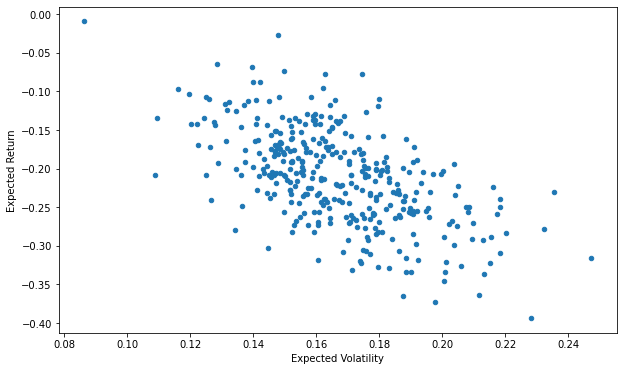

In [87]:
pfolio.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')


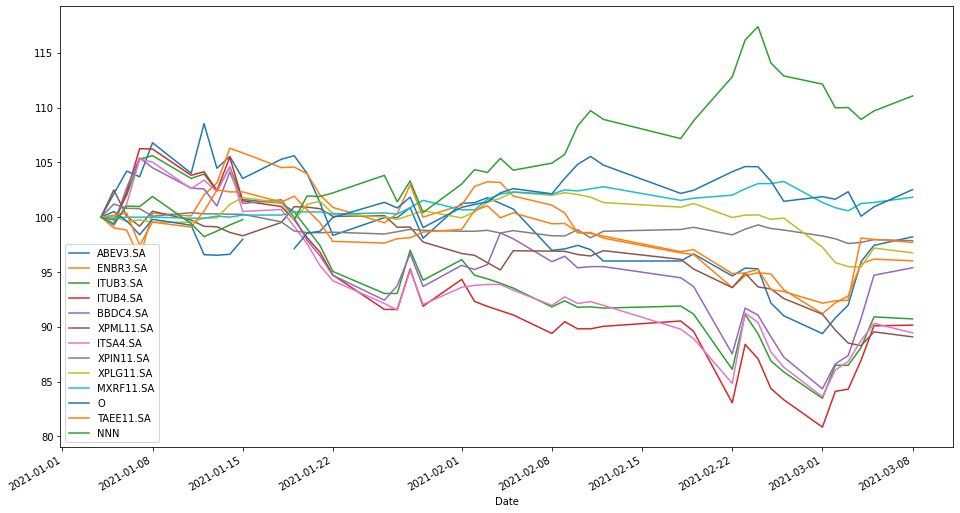

In [77]:
#normaliza atual / primeira * 100 neste caso toda a primeira será 100 tendo assim um ponto de referência
#evolução das ações(dados do yahoo finance)
(acoes / acoes.iloc[0] * 100).plot(figsize = (16,9));
plt.legend()
plt.show()

In [88]:
#retornos anuais dos ativos
retornos_anual = returns.mean() * 250
retornos_anual

ABEV3.SA    -0.059443
ENBR3.SA    -0.215022
ITUB3.SA    -0.533403
ITUB4.SA    -0.546706
BBDC4.SA    -0.217357
XPML11.SA   -0.690969
ITSA4.SA    -0.613122
XPIN11.SA   -0.130182
XPLG11.SA   -0.194084
MXRF11.SA    0.112734
O            0.234317
TAEE11.SA   -0.117021
NNN          0.704300
dtype: float64

In [79]:
# Retorno anual da carteira com seus respectivos pesos - pega os valores do yahoo finance. 
portofolio_1 = str(round(np.dot(retornos_anual, pesos),5) *100) + ' %'
#portofolio_1 = str(round(np.dot(retornos_anual, weights) *100, 5)) + ' %'
print(portofolio_1) 


-39.774 %


# Correlação

In [89]:
def plot_corr(corr):
    # Cortaremos a metade de cima pois é o espelho da metade de baixo
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask, 1)] = True

    sns.heatmap(corr, mask=mask, cmap='RdBu', center=0, square=True, linewidths=.5,annot=True  )

,ABEV3.SA,ENBR3.SA,ITUB3.SA,ITUB4.SA,BBDC4.SA,XPML11.SA,ITSA4.SA,XPIN11.SA,XPLG11.SA,MXRF11.SA,O,TAEE11.SA,NNN
ABEV3.SA,1.000000,0.820596,0.938985,0.925253,0.917709,0.742403,0.914916,0.635756,0.364258,-0.668051,-0.689252,0.869269,-0.833258
ENBR3.SA,0.820596,1.000000,0.724158,0.690780,0.731643,0.704786,0.695834,0.349774,0.598848,-0.439554,-0.543049,0.914143,-0.776514
ITUB3.SA,0.938985,0.724158,1.000000,0.996047,0.952966,0.783202,0.988776,0.784983,0.332945,-0.722010,-0.725733,0.777310,-0.848522
ITUB4.SA,0.925253,0.690780,0.996047,1.000000,0.948889,0.757714,0.986497,0.785757,0.281636,-0.743646,-0.742745,0.757278,-0.840336
BBDC4.SA,0.917709,0.731643,0.952966,0.948889,1.000000,0.712951,0.954310,0.722860,0.418289,-0.565311,-0.582853,0.832717,-0.780034
XPML11.SA,0.742403,0.704786,0.783202,0.757714,0.712951,1.000000,0.754014,0.647995,0.644405,-0.514795,-0.457849,0.667459,-0.767518
ITSA4.SA,0.914916,0.695834,0.988776,0.986497,0.954310,0.754014,1.000000,0.802988,0.325052,-0.679683,-0.696417,0.760745,-0.807145
XPIN11.SA,0.635756,0.349774,0.784983,0.785757,0.722860,0.647995,0.802988,1.000000,0.289105,-0.516643,-0.512980,0.454556,-0.572110
XPLG11.SA,0.364258,0.598848,0.332945,0.281636,0.418289,0.644405,0.325052,0.289105,1.000000,0.188065,0.081779,0.524845,-0.281582
MXRF11.SA,-0.668051,-0.439554,-0.722010,-0.743646,-0.565311,-0.514795,-0.679683,-0.516643,0.188065,1.000000,0.795336,-0.454619,0.794156


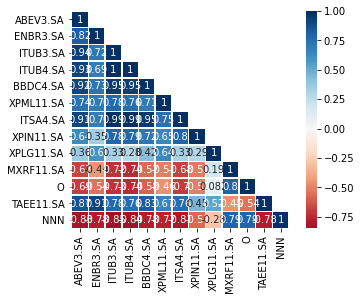

In [90]:
#Correlações entre os ativos da carteira
#plt.figure(figsize=(16,8))
plot_corr(acoes.corr())
acoes.corr()

In [82]:
#plt.figure(figsize=(10,6))
#sns.heatmap(acoes.corr() ,cmap='RdBu', square=True, linewidths=.2,annot=True)


In [83]:
acoes.skew()

ABEV3.SA    -0.203435
ENBR3.SA    -0.241940
ITUB3.SA     0.189553
ITUB4.SA     0.289813
BBDC4.SA    -0.213073
XPML11.SA   -0.801786
ITSA4.SA     0.337588
XPIN11.SA    0.774298
XPLG11.SA   -1.296194
MXRF11.SA    0.443859
O           -0.162387
TAEE11.SA   -0.773988
NNN          0.536200
dtype: float64

In [84]:
acoes.kurt(axis=1)

Date
2021-01-04   -0.411431
2021-01-05   -0.407544
2021-01-06   -0.409720
2021-01-07   -0.393970
2021-01-08   -0.408987
2021-01-11   -0.401915
2021-01-12   -0.363380
2021-01-13   -0.367335
2021-01-14   -0.349838
2021-01-15   -0.359320
2021-01-18   -0.816593
2021-01-19   -0.372368
2021-01-20   -0.378376
2021-01-21   -0.380664
2021-01-22   -0.414571
2021-01-26   -0.439881
2021-01-27   -0.432486
2021-01-28   -0.437633
2021-01-29   -0.399082
2021-02-01   -0.429244
2021-02-02   -0.427436
2021-02-03   -0.410445
2021-02-04   -0.410400
2021-02-05   -0.414523
2021-02-08   -0.419660
2021-02-09   -0.433097
2021-02-10   -0.460064
2021-02-11   -0.475775
2021-02-12   -0.476628
2021-02-18   -0.446200
2021-02-19   -0.444179
2021-02-22   -0.501560
2021-02-23   -0.512817
2021-02-24   -0.508461
2021-02-25   -0.492563
2021-02-26   -0.460376
2021-03-01   -0.505449
2021-03-02   -0.497289
2021-03-03   -0.500921
2021-03-04   -0.458846
2021-03-05   -0.451337
2021-03-08   -0.478085
dtype: float64

array([[<AxesSubplot:title={'center':'ABEV3.SA'}>,
        <AxesSubplot:title={'center':'ENBR3.SA'}>],
       [<AxesSubplot:title={'center':'ITUB3.SA'}>,
        <AxesSubplot:title={'center':'ITUB4.SA'}>],
       [<AxesSubplot:title={'center':'BBDC4.SA'}>,
        <AxesSubplot:title={'center':'ITSA4.SA'}>]], dtype=object)

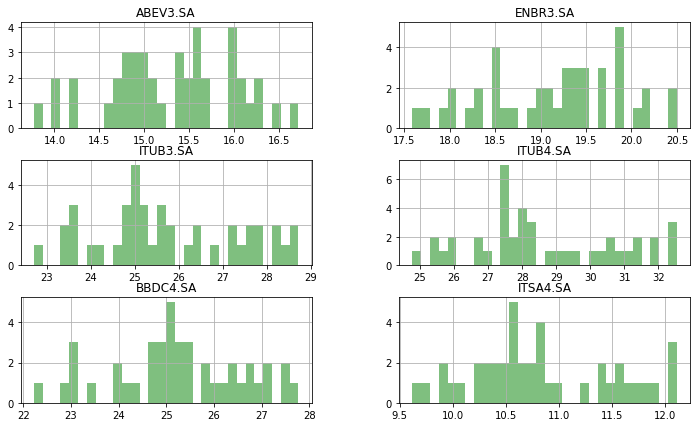

In [85]:
#ACOES

acoes[['ABEV3.SA','ENBR3.SA','ITUB3.SA','ITUB4.SA','BBDC4.SA','ITSA4.SA']].hist(bins=30,alpha=0.5,color='Green',figsize=(12,7))

array([[<AxesSubplot:title={'center':'XPML11.SA'}>,
        <AxesSubplot:title={'center':'XPIN11.SA'}>],
       [<AxesSubplot:title={'center':'XPLG11.SA'}>, <AxesSubplot:>]],
      dtype=object)

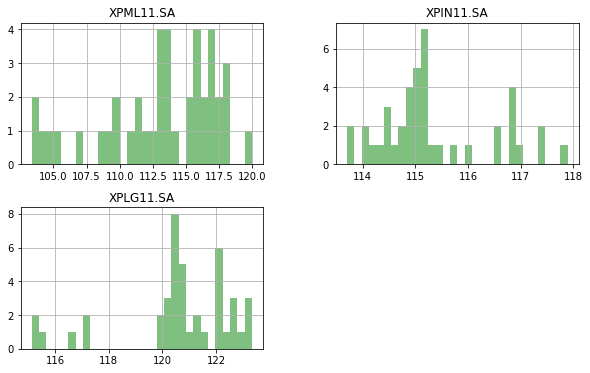

In [86]:
#FUNDOS IMOBILIARIOS
acoes[['XPML11.SA','XPIN11.SA','XPLG11.SA']].hist(bins=30,alpha=0.5,color='Green',figsize=(10,6))